In [389]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [390]:
url = "https://www.google.com/flights/explore/#explore;f=JFK,EWR,LGA;t=HND,NRT,TPE,HKG,KIX;s=1;li=8;lx=12;d=2016-04-01"
driver = webdriver.PhantomJS()
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.80 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap, service_args=['--ignore-ssl-errors=true'])
driver.implicitly_wait(20)
driver.get(url)

In [391]:
driver.save_screenshot(r'flight_explorer.png')

True

In [392]:
s = BeautifulSoup(driver.page_source, "lxml")

<!DOCTYPE html>
<html><head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="baseUrl=/flights/explore//static/" name="deals::gwt:property"/><title>Explore flights</title><meta content="Explore flights" name="description"/><script async="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.MWXgjJdrW-U.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/am=AAQ/rs=AItRSTMF4wQu85p8WjPpkdh4euJKa6l1Qw/cb=gapi.loaded_0"></script><script language="javascript" type="text/javascript">
var __JS_ILT__ = new Date();
</script>
<style type="text/css">#gbsfw{min-width:400px;overflow:visible}.gb_pb,#gbsfw.gb_g{display:block;outline:none}#gbsfw.gb_pa iframe{display:none}.gb_qb{padding:118px 0;text-align:center}.gb_rb{background:no-repeat center 0;color:#aaa;font-size:13px;line-height:20px;padding-top:76px;background-image:-webkit-image-set(url('//ssl.gstatic.com/gb/images/a/f5cdd88b65.png') 1x,url('//ssl.gstatic.com/gb/images/a/133fc21e88.png') 
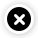
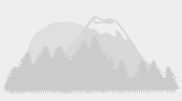

In [393]:
s

In [394]:
best_price_tags = s.findAll('div', 'FTWFGDB-w-e') 
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$','')))

In [395]:
best_price_tags

[<div class="FTWFGDB-w-e" style="top: 51.948782324880746px;">$610</div>,
 <div class="FTWFGDB-w-e" style="top: 22.3063973063973px;">$657</div>,
 <div class="FTWFGDB-w-e" style="top: 23.541730250029346px;">$663</div>,
 <div class="FTWFGDB-w-e" style="top: 45.73107268759442px;">$678</div>]

In [369]:
best_price = best_prices[0]
best_price

656

In [370]:
best_height_tags = s.findAll('div', 'FTWFGDB-w-f')
best_heights = []
for t in best_height_tags:
    best_heights.append(float(t.attrs['style']\
                              .split('height:')[1].replace('px;','')))

In [371]:
best_height = best_heights[0]
best_height

70.67025927808845

In [372]:
pph = np.array(best_price)/np.array(best_height)
pph

9.2825469539970253

In [373]:
cities = s.findAll('div', 'FTWFGDB-w-o')
cities

[<div class="FTWFGDB-w-o FTWFGDB-w-b"><div class="FTWFGDB-w-x FTWFGDB-w-f" style="left: 0px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x FTWFGDB-w-M" style="left: 6px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x FTWFGDB-w-M" style="left: 12px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x" style="left: 18px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x" style="left: 24px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x" style="left: 30px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x" style="left: 36px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x" style="left: 42px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x FTWFGDB-w-M" style="left: 48px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x FTWFGDB-w-M" style="left: 54px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x" style="left: 60px; height: 70.67025927808845px;"></div><div class="FTWFGDB-w-x"

In [374]:
len(cities)

4

In [375]:
hlist=[]
for bar in cities[0]\
    .findAll('div', 'FTWFGDB-w-x'):
    hlist.append(float(bar['style']\
                       .split('height: ')[1].replace('px;',''))*pph)

In [376]:
fares = pd.DataFrame(hlist, columns=['price'])

In [378]:
fares.min()

price    656
dtype: float64

In [379]:
fares

,price
0,656.000000
1,656.000000
2,656.000000
3,656.000000
4,656.000000
5,656.000000
6,656.000000
7,656.000000
8,656.000000
9,656.000000


In [380]:
fares.median()

price    677.91002
dtype: float64

In [381]:
fares.describe()

,price
count,60.000000
mean,706.359697
std,69.459200
min,656.000000
25%,656.000000
50%,677.910020
75%,728.833308
max,983.949977


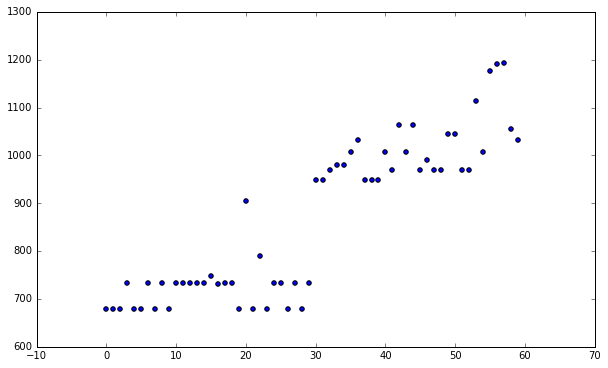

In [284]:
fig,ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(fares['price'])),fares['price']);

In [285]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [324]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns=['fare']).reset_index()

/Users/alexcombs/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/lines.py:1107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


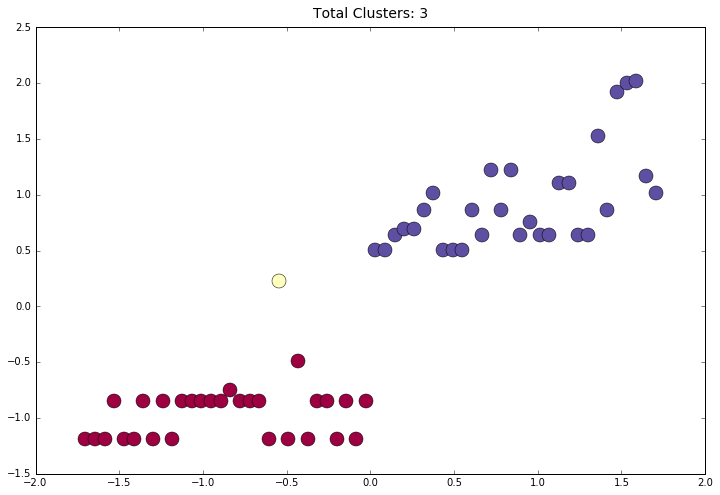

In [325]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=.5, min_samples=1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,
                        1, len(unique_labels)))

plt.subplots(figsize=(12,8))

for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=c,
             markeredgecolor='k',
             markersize=14)

plt.title("Total Clusters: {}".format(clusters),
          fontsize=14, y=1.01)

In [288]:
def test_clusters(data_series, eps_val, swap_index, swap_value):
    data_series[swap_index] = swap_value
    ff = pd.DataFrame(data_series, columns=['fare']).reset_index()
    X = StandardScaler().fit_transform(ff)
    db = DBSCAN(eps=eps_val, min_samples=1).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0,
                            1, len(unique_labels)))

    plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o',
                 markerfacecolor=c,
                 markeredgecolor='k',
                 markersize=14)

    plt.title("Total Clusters: {}".format(clusters),
              fontsize=14, y=1.01)

In [320]:
px = [x for x in fares['price']]

In [321]:
px[55]

1176.8414526129318

/Users/alexcombs/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/lines.py:1107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


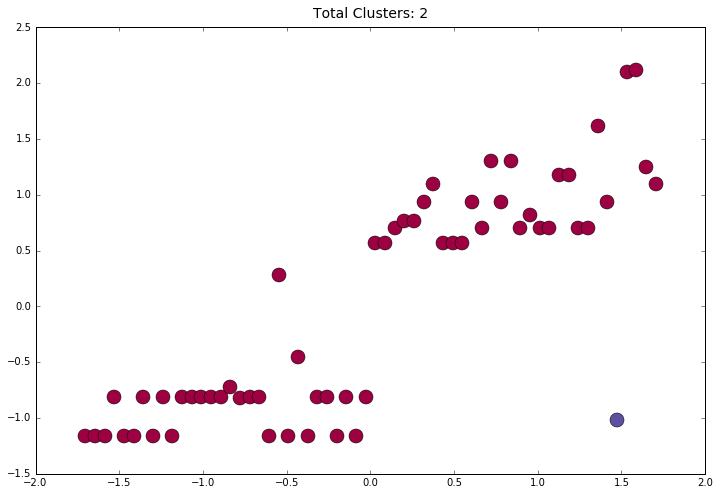

In [313]:
test_clusters(px, 1.5, 55, 700)

In [334]:
px[55]

700

In [358]:
px[55] = 625

In [359]:
ff = pd.DataFrame(px, columns=['fare']).reset_index()

/Users/alexcombs/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/lines.py:1107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


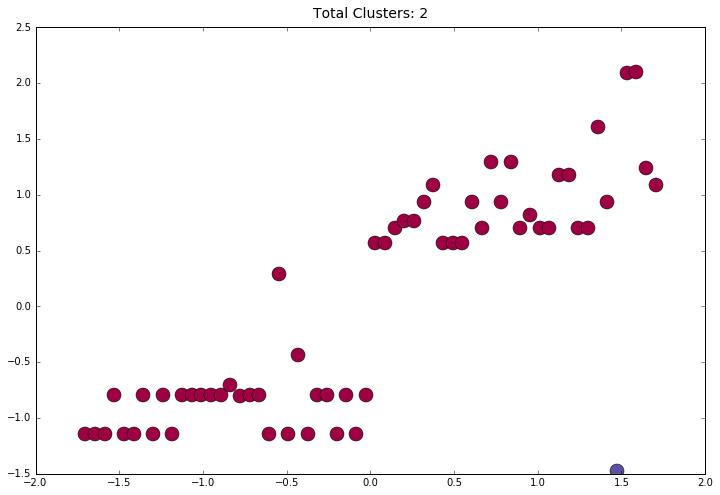

In [360]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=1.5, min_samples=1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,
                        1, len(unique_labels)))

plt.subplots(figsize=(12,8))

for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=c,
             markeredgecolor='k',
             markersize=14)

plt.title("Total Clusters: {}".format(clusters),
          fontsize=14, y=1.01)

In [341]:
pf = pd.concat([ff,pd.DataFrame(db.labels_,
                                columns=['cluster'])], axis=1)
pf

,index,fare,cluster
0,0,678.000000,0
1,1,678.000000,0
2,2,678.000000,0
3,3,732.648361,0
4,4,678.000000,0
5,5,678.000000,0
6,6,732.648361,0
7,7,678.000000,0
8,8,732.648361,0
9,9,678.000000,0


In [386]:
rf = pf.groupby('cluster')['fare'].agg(['min','count']).sort_values('min', ascending=True)
rf

,min,count
cluster,,
0,678,59
1,700,1


In [388]:
rf.iloc[0]['min']

678.0

In [342]:
pf['fare'].min()

678.0

In [354]:
rf.describe([.10,.25,.5,.75,.9])

,min,count
count,2.000000,2.000000
mean,689.000000,30.000000
std,15.556349,41.012193
min,678.000000,1.000000
10%,680.200000,6.800000
25%,683.500000,15.500000
50%,689.000000,30.000000
75%,694.500000,44.500000
90%,697.800000,53.200000
max,700.000000,59.000000


In [150]:
# we want min of the price cluster to equal the overall min 
# as well as to be in the bottom quartile of sizes

In [348]:
rf['count'].quantile(.10)

6.8000000000000007

In [351]:
pd.Series([50,6,4]).quantile(.10)

4.4000000000000004